In [1]:
import numpy as np

np.set_printoptions(precision=3, suppress=True)
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
A

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [2]:
# empty sets;
B = np.empty([3, 3])
B

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:
# Zeroes
C = np.zeros([3, 5])
C

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [4]:
# Vectors: List or column of scalars
# Vector Addition:
C = A + B

In [5]:
# Vector dot product
C = A.dot(B)
C

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
from numpy.linalg import norm

lower = np.tril(C)
lower

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [7]:
# Linear Regresssion - 19.4
data = np.array([[0.05, 0.12], [0.18, 0.22], [0.31, 0.35], [0.42, 0.38],
                 [0.5, 0.49]])
print(data)

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


In [8]:
X, y = data[:, 0], data[:, 1]
X = X.reshape((len(X), 1))
print(X)

[[0.05]
 [0.18]
 [0.31]
 [0.42]
 [0.5 ]]


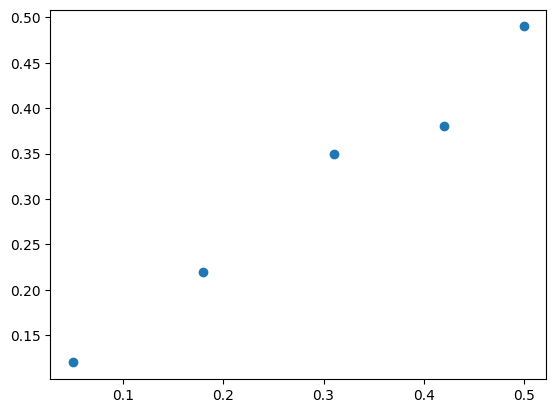

In [9]:
from matplotlib import pyplot as plt

plt.scatter(X, y)
plt.show()

Solving via Inverse
First approach to solving the regression problem directly is by using the matrix inverse.
That is, given $X$, what are the set of coefficients $b$ that when multiplied by $X$ will give $y$? The normal equations define how to calculate $b$ directly.

> > $b = (X^T \cdot X)^{-1} \cdot X^T \cdot y$


[1.002]


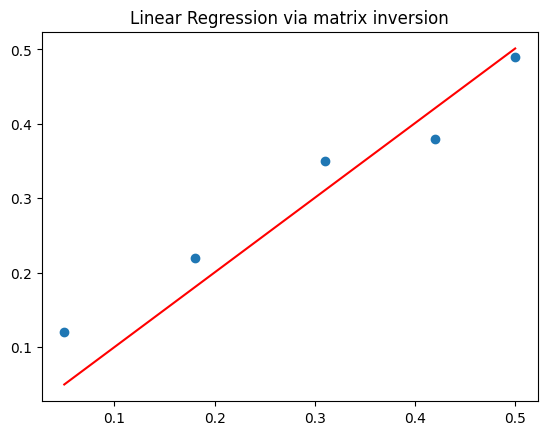

In [10]:
from numpy.linalg import inv
# linear least squares
# in numpy this can be done using the np.inv() function for calculating the matrix inverse.
b = inv(X.T.dot(X)).dot(X.T).dot(
    y)  # dot product => * in the equation above, not multiply
print(b)

# predict using coefficients
y_hat = X.dot(b)

plt.scatter(X, y)
plt.plot(X, y_hat, color='red')
plt.title('Linear Regression via matrix inversion', fontsize=12)
plt.show()


Solve via QR Decomposition

The qr decomposition is an approach of breaking a matrix down into its constituent elements:

> > $A = Q \cdot R$

Where $A$ is the matrix that we wish to decompose, $Q$ a matrix with the size $m \times n$ and $R$ is an upper triangle matrix with size $m \times n$. The QR decomposition is a popular approach for solving the linear least squares equation. Stepping over all the derivation (see later) the coefficients can be found using the $Q$ and $R$ elements as such:

> > $b = R^{-1} \cdot Q^T \cdot y$

The approach still involves matrix inversion, but in this case only on the simpler $R$ matrix. The QR decomposition can be found using the numpy.linalg.qr function. The calculation of the coefficients in numpy looks as follows:


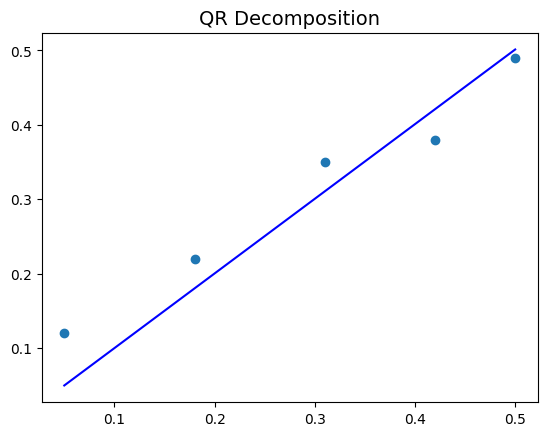

In [11]:
from numpy.linalg import qr

Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y)
b
y_hat = X.dot(b)
plt.scatter(X, y)
plt.plot(X, y_hat, color='blue')
plt.title('QR Decomposition', fontsize=14)
plt.show()

Solving via SVD & Pseudoinversion
Singular-Value Decomposition is a matrix decomposition method like QR decomposition. It is a generalization of the eigendecomposition of a square normal matrix to any $m \times n$ matrix via an extension of the polar decomposition. The SVD is a factorization of a real or complex matrix $A$ into the product of three matrices:

> > $X = U \cdot \Sigma \cdot V^{T}$

Where $A$ is the real $n \times m$ matrix that we want to decompose, $U$ is a $m \times m$ matrix, $\Sigma$ is an $m \times n$ diagonal matrix, and $V^T$ is the transpose of an $n \times n$ matrix. Unlike the QR decomposition, all matrices have an SVD. As a basis for solving the system of linear equations for linear regression, SVD is more stable and often the preferred approach. Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix $X$ and multiplying that by the output vector $y$.

> > $b = X^{+} \cdot y$

Where the psuedoinverse $X^{+}$ is calculated as such:

> > $X^{+} = U \cdot D^{+} \cdot V^{T}$

Where $X^{+}$ is the pseudoinverse of $X$ and $+$ is the superscript, $D^{+}$ is the pseudoinverse of the diagonal matrix $\Sigma$ and $V^T$ is the transpose of $V$. numpy provides the pinv() function to calculate the psuedoinverse directly.


[1.002]


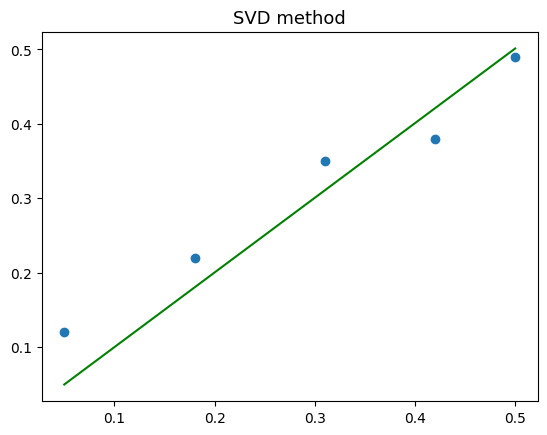

In [12]:
from numpy.linalg import pinv

b = pinv(X).dot(y)
print(b)
y_hat = X.dot(b)
plt.scatter(X, y)
plt.plot(X, y_hat, color='green')
plt.title('SVD method', fontsize=13)
plt.show()


[1.002]


C:\Users\eorlo\AppData\Local\Temp\ipykernel_8356\1019595140.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, residuals, rank, s = np.linalg.lstsq(X, y)


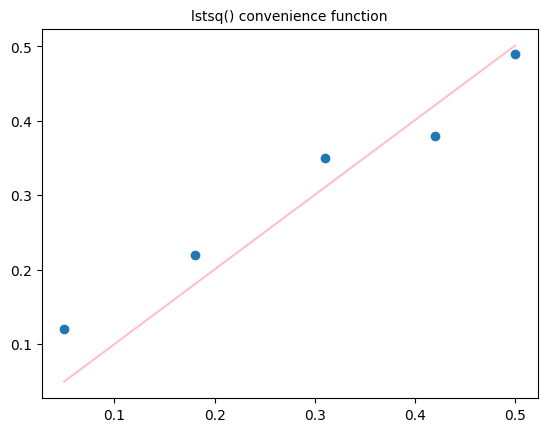

In [13]:
"""
Last but not least, numpy has a convenience function named "lstsq()" that solves the linear least squares using SVD.
The function takes as input the X matrix and y vector and returns the b coefficients as well as residual errors, the rank of the provided X matrix and the singular values.
"""
b, residuals, rank, s = np.linalg.lstsq(X, y)
print(b)
y_hat = X.dot(b)
plt.scatter(X, y)
plt.plot(X, y_hat, color='pink')
plt.title('lstsq() convenience function', fontsize=10)
plt.show()

In [14]:
# Numpy - Combining arrays (vertical & horizontal stacking)
# 4.4
a1 = np.array([1, 2, 3])
a2 = np.array([4, 5, 6])
a3 = np.vstack((a1, a2))
print(a3, '\n\n', a3.shape)


[[1 2 3]
 [4 5 6]] 

 (2, 3)


In [15]:
a3 = np.hstack((a1, a2))
print(f"horizontal stacking results in 'a3': {a3}, with shape: {a3.shape}")

horizontal stacking results in 'a3': [1 2 3 4 5 6], with shape: (6,)


In [16]:
print(a2[-2:])

[5 6]


In [17]:
A = np.random.randn(4, 4)
B = np.random.randn(4, 4)

# solve for X
X1 = np.linalg.inv(A) @ B
X2 = B @ np.linalg.inv(A)

# residual (should return matrix of zeros)
res1 = A @ X1 - B
res2 = A @ X2 - B

print(f"res1:\n{res1}\n\nres2:\n{res2}")

res1:
[[-0.  0.  0.  0.]
 [-0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]]

res2:
[[-2.69   1.225 -2.309 -2.556]
 [ 1.715  0.042  1.147  2.023]
 [ 3.517 -1.251  2.339  2.587]
 [ 0.534 -0.79   0.081  0.309]]


if matrix multiplication were commutative (meaning the order doesnt matter),
then `res1` and `res2` should both equal the zeros matrix.


In [18]:
one = np.hstack

AttributeError: module 'numpy' has no attribute 'hsta'